# Importing Libraries

Pandas: Used to store data into dataframes
Matplotlib: Used for Plotting Graphs
Requests: Used for fetching data from url
Json: Used to parse the JSON data from website
openpyxl: Used for storing graph images
Tabulate: Used to output formatted tables

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
import json
from openpyxl.drawing.image import Image
from tabulate import tabulate
from openpyxl import load_workbook

# Parsing URL
Make a request for fetching url and storing JSON data on that url into a local file

In [18]:
url = "https://disease.sh/v3/covid-19/countries"
response = requests.get(url)
data = response.json()
with open('Covid-Data.json', 'w') as f:
    json.dump(data, f, indent=4)

# Creating Dataframes
From the JSON data we stored, we normalize it and store in the dataframe with respected columns, and remove unwanted values

In [19]:
df = pd.json_normalize(data)
df = df[['country', 'cases', 'deaths', 'recovered', 'active', 'tests', 'population']]
excluded_countries = ['Aruba', 'Saint Helena', 'Tokelau', 'Western Sahara', 'Diamond Princess', 'MS Zaandam', 'Wallis and Futuna','British Virgin Islands','Cabo Verde','Caribbean Netherlands','Cayman Islands','Channel Islands','Cook Islands','Curaçao','Falkland Islands (Malvinas)','Faroe Islands','Gibraltar','Guadeloupe','Isle of Man','Libyan Arab Jamahiriya','Macao','Martinique','Montserrat','New Caledonia','Niue','Réunion','Saint Martin','Saint Pierre Miquelon','Sint Maarten','St. Barth']
df = df[~df['country'].isin(excluded_countries)]
df.dropna(inplace=True)
print(tabulate(df.head(),headers='keys', tablefmt='pretty'))

+---+-------------+--------+--------+-----------+--------+---------+------------+
|   |   country   | cases  | deaths | recovered | active |  tests  | population |
+---+-------------+--------+--------+-----------+--------+---------+------------+
| 0 | Afghanistan | 234174 |  7996  |  211080   | 15098  | 1390730 |  40754388  |
| 1 |   Albania   | 334863 |  3605  |  330233   |  1025  | 1941032 |  2866374   |
| 2 |   Algeria   | 272010 |  6881  |  183061   | 82068  | 230960  |  45350148  |
| 3 |   Andorra   | 48015  |  165   |     0     | 47850  | 249838  |   77463    |
| 4 |   Angola    | 107327 |  1937  |  103419   |  1971  | 1499795 |  35027343  |
+---+-------------+--------+--------+-----------+--------+---------+------------+


# Analyze Healthcare
Calculate several factors like death rate, tests per case and survival rate

In [20]:
df['death_rate'] = ((df['deaths'] / df['cases'])*100).round(3)
df['recovery-rate'] = ((df['recovered'] / df['cases'])*100).round(3)
df['tests-per-case'] = ((df['tests'] / df['cases'])*100).round(3)
print(tabulate(df[['country', 'death_rate', 'recovery-rate', 'tests-per-case']].head(), headers='keys', tablefmt='pretty'))

+---+-------------+------------+---------------+----------------+
|   |   country   | death_rate | recovery-rate | tests-per-case |
+---+-------------+------------+---------------+----------------+
| 0 | Afghanistan |   3.415    |    90.138     |    593.887     |
| 1 |   Albania   |   1.077    |    98.617     |     579.65     |
| 2 |   Algeria   |    2.53    |    67.299     |     84.909     |
| 3 |   Andorra   |   0.344    |      0.0      |    520.333     |
| 4 |   Angola    |   1.805    |    96.359     |    1397.407    |
+---+-------------+------------+---------------+----------------+


# Sorting Dataframe
sort countries by different parameters like most deaths, least deaths, highest recovery etc.

In [21]:
mostAffected = df.sort_values(by='cases', ascending=False).head(10)
leastAffected = df.sort_values(by='cases', ascending=True).head(10)
highestDeathRate = df.sort_values(by='death_rate', ascending=False).head(10)
lowestDeathRate = df.sort_values(by='death_rate', ascending=True).head(10)
mostActiveCases = df.sort_values(by='active', ascending=False).head(10)

print("Top 3 Most Affected Countries:")
print(tabulate(mostAffected[['country', 'cases']].head(3), headers='keys', tablefmt='pretty'))

print("\nTop 3 Least Affected Countries:")
print(tabulate(leastAffected[['country', 'cases']].head(3), headers='keys', tablefmt='pretty'))

print("\nTop 3 Countries with Highest Death Rate:")
print(tabulate(highestDeathRate[['country', 'death_rate']].head(3), headers='keys', tablefmt='pretty'))

print("\nTop 3 Countries with Lowest Death Rate:")
print(tabulate(lowestDeathRate[['country', 'death_rate']].head(3), headers='keys', tablefmt='pretty'))

print("\nTop 3 Countries with Most Active Cases:")
print(tabulate(mostActiveCases[['country', 'active']].head(3), headers='keys', tablefmt='pretty'))

Top 3 Most Affected Countries:
+-----+---------+-----------+
|     | country |   cases   |
+-----+---------+-----------+
| 218 |   USA   | 111820082 |
| 94  |  India  | 45035393  |
| 71  | France  | 40138560  |
+-----+---------+-----------+

Top 3 Least Affected Countries:
+-----+-------------------------------+-------+
|     |            country            | cases |
+-----+-------------------------------+-------+
| 89  | Holy See (Vatican City State) |  29   |
| 215 |            Tuvalu             | 2943  |
|  5  |           Anguilla            | 3904  |
+-----+-------------------------------+-------+

Top 3 Countries with Highest Death Rate:
+-----+----------------------+------------+
|     |       country        | death_rate |
+-----+----------------------+------------+
| 228 |        Yemen         |   18.075   |
| 197 |        Sudan         |   7.885    |
| 202 | Syrian Arab Republic |   5.481    |
+-----+----------------------+------------+

Top 3 Countries with Lowest Death Rate:

#Storing Data
Stored DAta in Excel with Proper Formatting

In [22]:
# Save DataFrame to Excel
df.to_excel("covid_report.xlsx", index=False)

# Auto-adjust column widths
wb = load_workbook("covid_report.xlsx")
ws = wb.active

for col in ws.columns:
    max_length = 0
    col_letter = col[0].column_letter
    for cell in col:
        try:
            if cell.value:
                max_length = max(max_length, len(str(cell.value)))
        except:
            pass
    adjusted_width = max_length + 2
    ws.column_dimensions[col_letter].width = adjusted_width

wb.save("covid_report.xlsx")

# Plotting Data.
The Stored Data are plotted onto graph to visualize the analytics

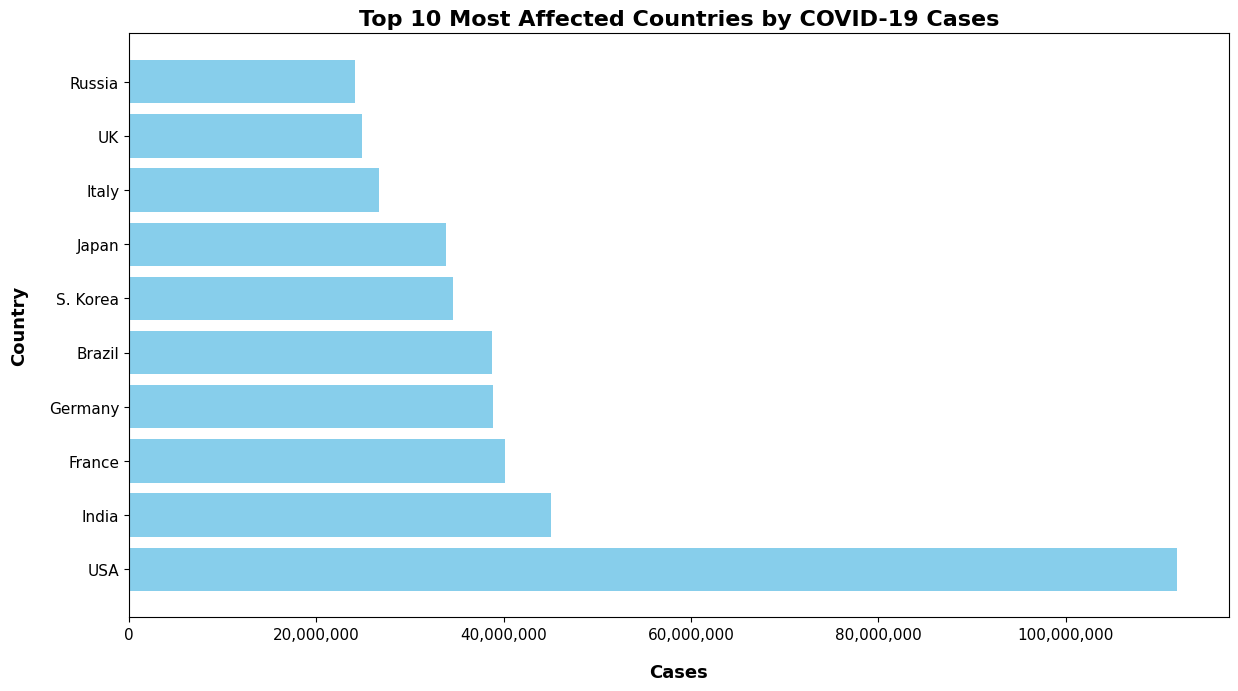

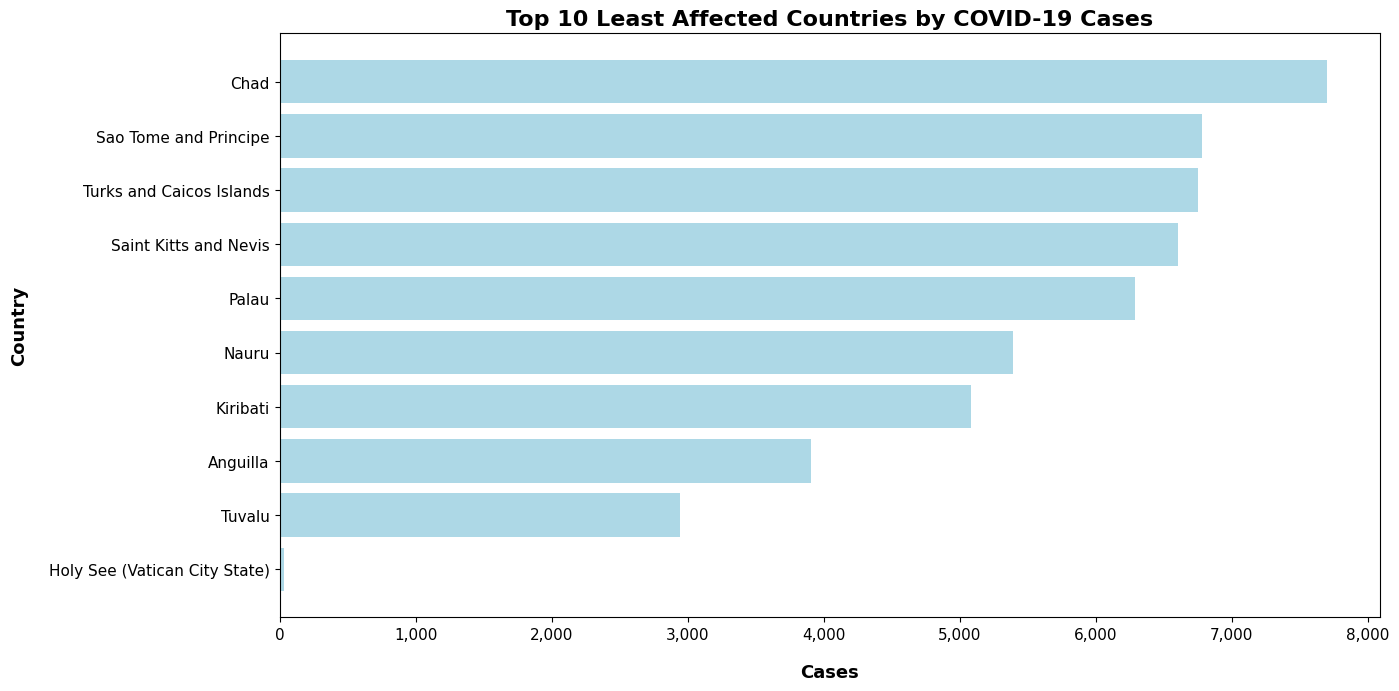

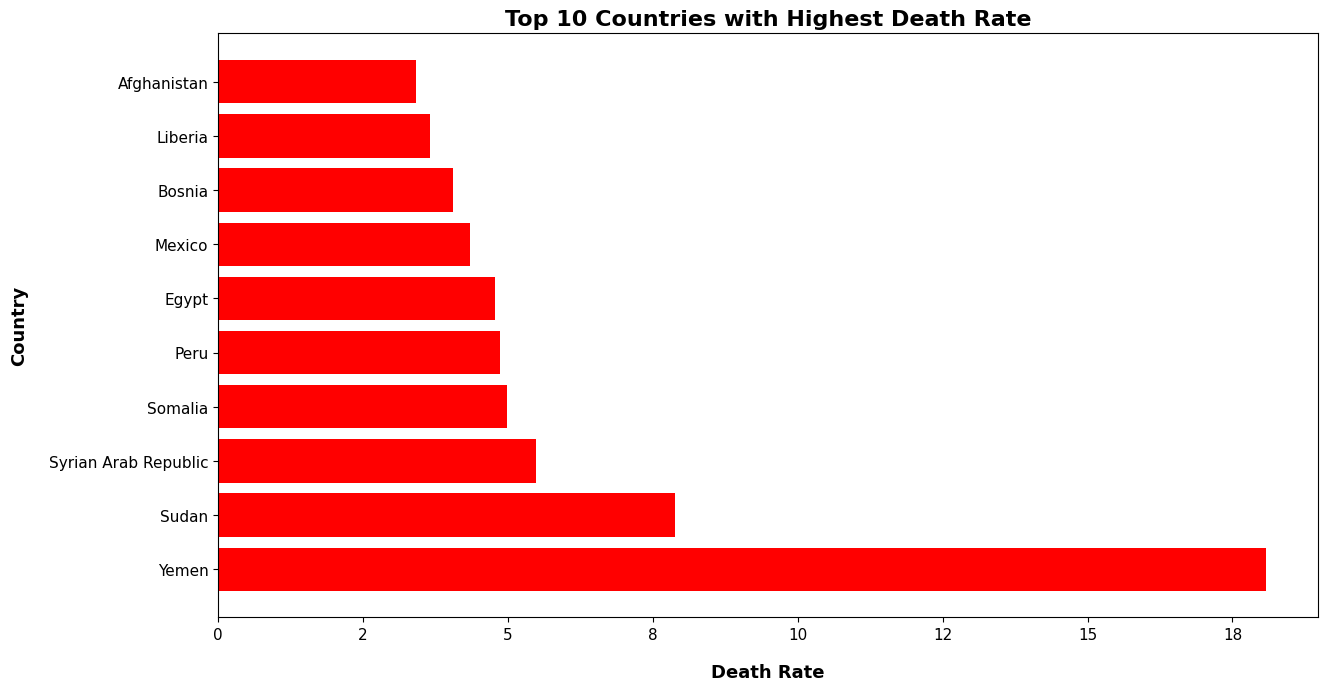

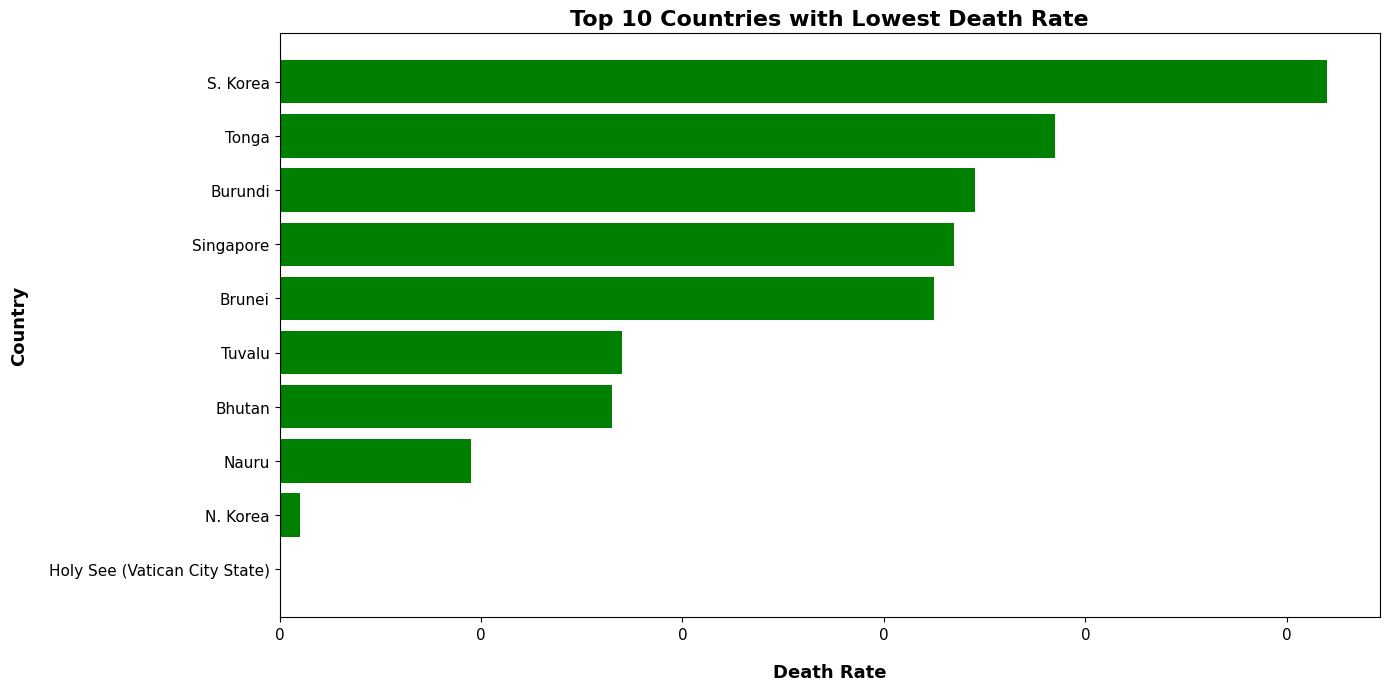

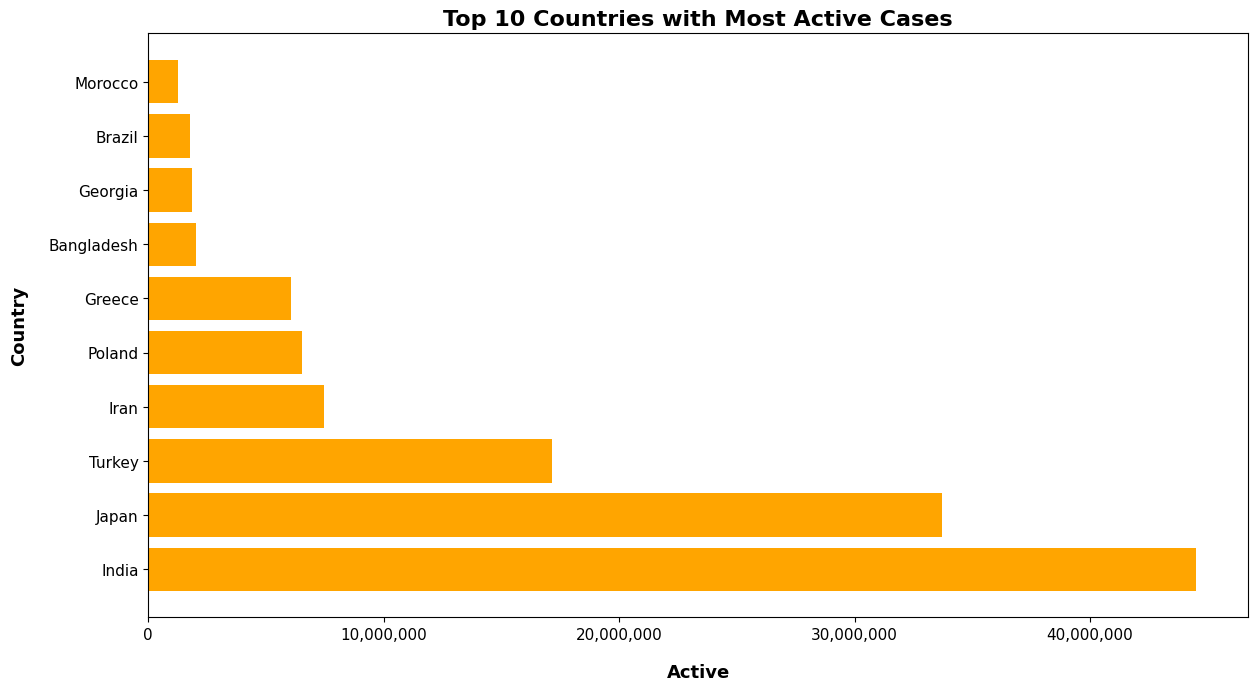

In [25]:
def createChart(df, column, title, filename, color='skyblue'):
    plt.figure(figsize=(10, 8))
    plt.barh(df['country'], df[column], color=color)

    plt.title(title, fontsize=16, fontweight='bold', loc='center',)
    plt.xlabel(column.replace("_", " ").title(), fontsize=13, fontweight='bold', labelpad=15)
    plt.ylabel("Country", fontsize=13, fontweight='bold', labelpad=15)

    plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    plt.subplots_adjust(left=0.1, right=0.95, top=0.88, bottom=0.15)
    plt.subplots_adjust(right=1.20)
    plt.show()
    plt.close()

createChart(mostAffected, 'cases', 'Top 10 Most Affected Countries by COVID-19 Cases', 'most_affected_cases')
createChart(leastAffected, 'cases', 'Top 10 Least Affected Countries by COVID-19 Cases', 'least_affected_cases', color='lightblue')
createChart(highestDeathRate, 'death_rate', 'Top 10 Countries with Highest Death Rate', 'highest_death_rate', color='red')
createChart(lowestDeathRate, 'death_rate', 'Top 10 Countries with Lowest Death Rate', 'lowest_death_rate', color='green')
createChart(mostActiveCases, 'active', 'Top 10 Countries with Most Active Cases', 'most_active_cases', color='orange')